# Mongolia's Marriage Spike

This notebook covers a simple analysis of an obvious spike in marriage during 2006-2009. Datasets used:

- [REGISTERED MARRIAGES, by sex and age group](http://www.1212.mn/tables.aspx?tbl_id=DT_NSO_0300_019V1&13999001_select_all=0&13999001SingleSelect=_T1&AGE_GROUP_select_all=1&AGE_GROUPSingleSelect=&YearY_select_all=1&YearYSingleSelect=&viewtype=linechart) - 1212.mn
- [DEVORCES, by duration of marriage](http://www.1212.mn/tables.aspx?tbl_id=DT_NSO_0300_021V1&duration_of_marriage_select_all=1&duration_of_marriageSingleSelect=&YearY_select_all=1&YearYSingleSelect=&viewtype=linechart) - 1212.mn

Note: The spelling mistake in Divorces is from 1212.mn.

We have a few goals with this notebook. 

1. Show a time series of marriages (total and broken down by age) with the spike from 2016-2019.
2. Show a time series of divorces (total and broken down by duration of marriage).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import AutoMinorLocator
import palettable

In [2]:
plt.style.use('../mds.mplstyle')

In [3]:
marriage = pd.read_csv("DT_NSO_0300_019V1_-_2021-10-18_-_www.1212.mn.csv", thousands=",")

In [4]:
divorce = pd.read_csv("DT_NSO_0300_021V1_-_2021-10-18_-_www.1212.mn.csv", thousands=",")

## Clean data

1212 data is always in a short form, or pivoted form. We need to melt the dataframe to get it in a shape we can use.

In [5]:
marriage.head()

,Statistical indicator,Age group,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Male,Total,15106,14188,14421,13908,13722,12601,12393,13514,...,11769,12822,15785,17332,17586,16778,20470,21020,20043,14252
1,Male,18-19,834,714,547,757,780,417,473,420,...,211,237,525,566,217,172,181,188,221,156
2,Male,20-24,6884,6277,6593,5938,5771,5173,4917,4654,...,4261,5204,5523,5611,5157,4462,4783,4730,4511,3510
3,Male,25-29,5068,4572,4910,4649,4477,4342,4135,4590,...,3998,4277,5529,6375,6874,6635,8275,8018,7481,5168
4,Male,30-34,1640,1717,1506,1718,1634,1689,1580,2224,...,1558,1459,2051,2215,2546,2645,3520,4057,4076,2801


In [6]:
marriage = marriage.melt(id_vars=['Statistical indicator','Age group'], var_name='year', value_name='marriages')

In [7]:
marriage['year'] = pd.to_datetime(marriage['year'])

In [8]:
divorce.head()

,Duration of marriage,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Total,1014,1127,1095,984,768,731,901,908,1027,...,3222,2467,3522,3750,3873,4003,3945,4201,4262,3316
1,Until 1 year,77,68,50,82,68,83,40,58,29,...,83,4,97,51,37,24,13,21,58,57
2,1-3,243,261,183,163,149,186,152,173,163,...,611,368,249,265,259,262,249,280,272,277
3,4-6,327,368,297,221,181,166,255,215,240,...,777,833,1001,914,608,589,538,519,539,373
4,7-9,159,191,253,241,152,139,221,192,193,...,349,280,661,913,1186,1062,835,773,637,467


In [9]:
divorce = divorce.melt(id_vars=['Duration of marriage'], var_name='year', value_name='divorces')

In [10]:
divorce['year'] = pd.to_datetime(divorce['year'])

## 1. Time series of marriages

In [11]:
marriage

,Statistical indicator,Age group,year,marriages
0,Male,Total,1995-01-01,15106
1,Male,18-19,1995-01-01,834
2,Male,20-24,1995-01-01,6884
3,Male,25-29,1995-01-01,5068
4,Male,30-34,1995-01-01,1640
...,...,...,...,...
229,Male,30-34,2020-01-01,2801
230,Male,35-39,2020-01-01,1090
231,Male,40-44,2020-01-01,550
232,Male,45-49,2020-01-01,436


In [12]:
marriage.head()

,Statistical indicator,Age group,year,marriages
0,Male,Total,1995-01-01,15106
1,Male,18-19,1995-01-01,834
2,Male,20-24,1995-01-01,6884
3,Male,25-29,1995-01-01,5068
4,Male,30-34,1995-01-01,1640


### Total marriages

/tmp/ipykernel_32264/1950285959.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","10,000", "20,000", "30,000", "40,000", "50,000"])


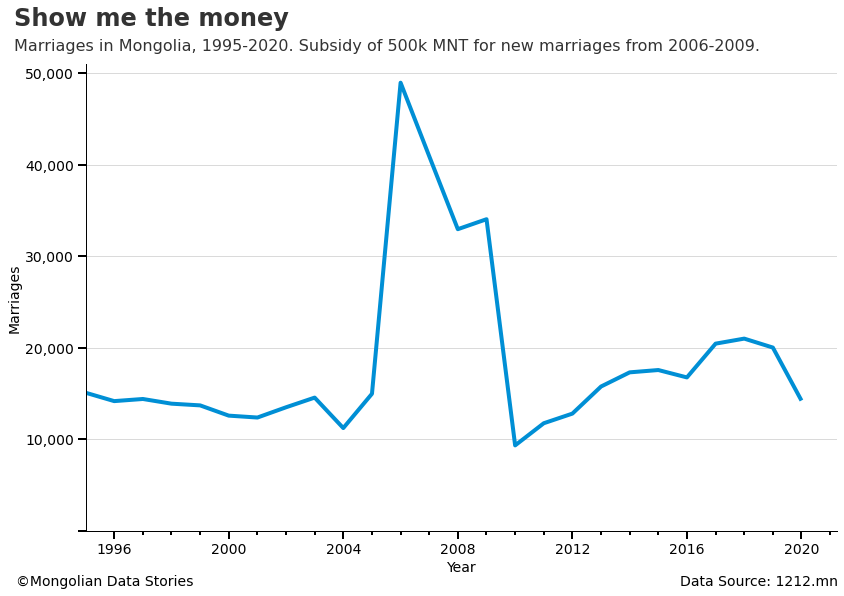

In [13]:
fig, ax = plt.subplots()

# Plot data and label axes
x = marriage[marriage['Age group'] == 'Total']['year']
y = marriage[marriage['Age group'] == 'Total']['marriages']
ax.plot(x, y, label='Total Marrirage')
ax.set_xlabel('Year')
ax.set_ylabel("Marriages")
ax.set_ylim(top=51000, bottom=0)
ax.set_xlim(left=datetime.datetime(1995,1,1))

# Set Spines
ax.spines.bottom.set_position(('data', 0))
ax.grid(axis='y', alpha=.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor',  width=2, length=4)
ax.tick_params(which='major',  width=2, length=8)

# Set custom yticks
ax.set_yticklabels(["","10,000", "20,000", "30,000", "40,000", "50,000"])

# Title and subtitle
ax.text(x = datetime.date(1992, 7, 1), y = 55200, s = 'Show me the money', fontsize=24, weight='bold', alpha=.8)
ax.text(x = datetime.date(1992, 7, 1), y = 52500, s = 'Marriages in Mongolia, 1995-2020. Subsidy of 500k MNT for new marriages from 2006-2009.', fontsize=16, alpha=.8)

# Set bottom banner
ax.text(x = datetime.date(1992, 8, 1), y = -6000, s = '©Mongolian Data Stories', fontsize = 14 )
ax.text(x = datetime.date(2015, 10, 1), y = -6000, s = 'Data Source: 1212.mn', fontsize = 14)

plt.savefig('total-marriages.png', dpi = 300, bbox_inches="tight")

### Marriages by age group

Merge marriages by decade:
- 18-19
- 20-29
- 30-39
- 40-49
- 50+

In [14]:
marriage_age_groups = pd.DataFrame(data={'year':marriage['year'].unique()})

In [15]:
# 18-19 is different, not need to add them up
marriage_age_groups['18-19'] = marriage[marriage['Age group'] == '18-19']['marriages'].reset_index(drop=True)

marriage_age_groups['20-29'] = marriage[marriage['Age group'] == '20-24'].merge(marriage[marriage['Age group'] == '25-29'], on='year')[['marriages_x','marriages_y']].sum(axis=1)
marriage_age_groups['30-39'] = marriage[marriage['Age group'] == '30-34'].merge(marriage[marriage['Age group'] == '35-39'], on='year')[['marriages_x','marriages_y']].sum(axis=1)
marriage_age_groups['40-49'] = marriage[marriage['Age group'] == '40-44'].merge(marriage[marriage['Age group'] == '45-49'], on='year')[['marriages_x','marriages_y']].sum(axis=1)

# 50+ is different too
marriage_age_groups['50+'] = marriage[marriage['Age group'] == '50+']['marriages'].reset_index(drop=True)

In [16]:
marriage_age_groups.head()

,year,18-19,20-29,30-39,40-49,50+
0,1995-01-01,834,11952,2081,197,42
1,1996-01-01,714,10849,2324,252,49
2,1997-01-01,547,11503,2065,244,62
3,1998-01-01,757,10587,2294,222,48
4,1999-01-01,780,10248,2278,338,78


/tmp/ipykernel_32264/1628969892.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","5,000","10,000","15,000", "20,000","25,000", "30,000", "35,000", "40,000"])


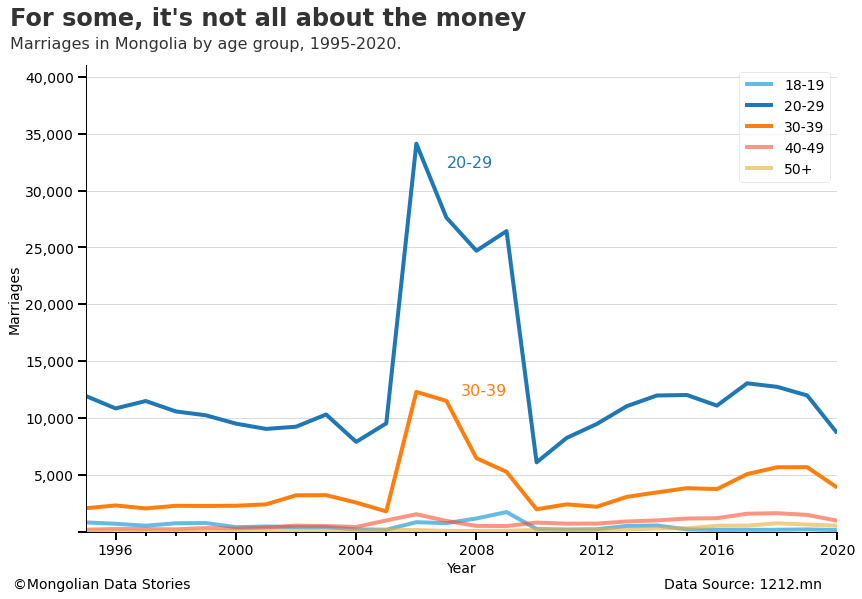

In [17]:
fig, ax = plt.subplots()

# Plot data and label axes
ax.plot(marriage_age_groups['year'], marriage_age_groups['18-19'], label='18-19', alpha=.6)
ax.plot(marriage_age_groups['year'], marriage_age_groups['20-29'], label='20-29', c='tab:blue')
ax.plot(marriage_age_groups['year'], marriage_age_groups['30-39'], label='30-39', c='tab:orange')
ax.plot(marriage_age_groups['year'], marriage_age_groups['40-49'], label='40-49', alpha=.6)
ax.plot(marriage_age_groups['year'], marriage_age_groups['50+'], label='50+', alpha=.6)

ax.set_xlabel('Year')
ax.set_ylabel("Marriages")
ax.set_ylim(top=41000, bottom=0)
ax.set_xlim(left=datetime.datetime(1995,1,1), right=datetime.datetime(2020,1,1))

# Set Spines
ax.spines.bottom.set_position(('data', 0))
ax.grid(axis='y', alpha=.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor',  width=2, length=4)
ax.tick_params(which='major',  width=2, length=8)

# Set custom yticks
ax.set_yticklabels(["","5,000","10,000","15,000", "20,000","25,000", "30,000", "35,000", "40,000"])

# Add annotations
ax.text(x = datetime.date(2007, 1, 1), y=32000, s='20-29', fontsize = 16, color='tab:blue')
ax.text(x = datetime.date(2007, 7, 1), y=12000, s='30-39', fontsize = 16, color='tab:orange')

# Title and subtitle
ax.text(x = datetime.date(1992, 7, 1), y = 44500, s = "For some, it's not all about the money", fontsize=24, weight='bold', alpha=.8)
ax.text(x = datetime.date(1992, 7, 1), y = 42500, s = 'Marriages in Mongolia by age group, 1995-2020.', fontsize=16, alpha=.8)

# Set bottom banner
ax.text(x = datetime.date(1992, 8, 1), y = -5000, s = '©Mongolian Data Stories', fontsize = 14 )
ax.text(x = datetime.date(2014, 4, 1), y = -5000, s = 'Data Source: 1212.mn', fontsize = 14)
ax.legend()

plt.savefig('marriages-by-age-group.png', dpi = 300, bbox_inches="tight")

## 2. Time series of divorces

### Total Divorces

In [18]:
divorce.head()

,Duration of marriage,year,divorces
0,Total,1989-01-01,1014
1,Until 1 year,1989-01-01,77
2,1-3,1989-01-01,243
3,4-6,1989-01-01,327
4,7-9,1989-01-01,159


/tmp/ipykernel_32264/2940941039.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","1,000", "2,000", "3,000", "4,000", "5,000"])


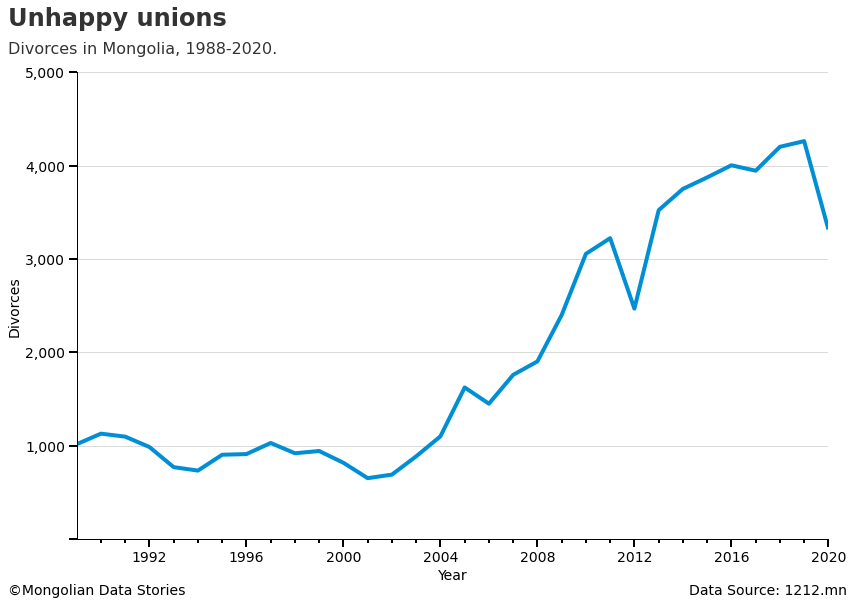

In [19]:
fig, ax = plt.subplots()

# Plot data and label axes
x = divorce[divorce['Duration of marriage'] == 'Total']['year']
y = divorce[divorce['Duration of marriage'] == 'Total']['divorces']
ax.plot(x, y, label='Total Divorces')
ax.set_xlabel('Year')
ax.set_ylabel("Divorces")
ax.set_ylim(top=5000, bottom=0)
ax.set_xlim(left=datetime.datetime(1989,1,1), right=datetime.datetime(2020,1,1))

# Set Spines
ax.spines.bottom.set_position(('data', 0))
ax.grid(axis='y', alpha=.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor',  width=2, length=4)
ax.tick_params(which='major',  width=2, length=8)

# Set custom yticks
ax.set_yticklabels(["","1,000", "2,000", "3,000", "4,000", "5,000"])

# Title and subtitle
ax.text(x = datetime.date(1986, 3, 1), y = 5500, s = 'Unhappy unions', fontsize=24, weight='bold', alpha=.8)
ax.text(x = datetime.date(1986, 3, 1), y = 5200, s = 'Divorces in Mongolia, 1988-2020.', fontsize=16, alpha=.8)

# Set bottom banner
ax.text(x = datetime.date(1986, 3, 1), y = -600, s = '©Mongolian Data Stories', fontsize = 14 )
ax.text(x = datetime.date(2014, 4, 1), y = -600, s = 'Data Source: 1212.mn', fontsize = 14)

plt.savefig('total-divorces.png', dpi = 300, bbox_inches="tight")

### Divorces by Duration of Marriage

Merge divorces by duration of marriage:
- Less than 1 year (Until 1 year)
- 1-3 years
- 4-6 years
- 7-9 years
- 10 and over

In [20]:
divorce.head()

,Duration of marriage,year,divorces
0,Total,1989-01-01,1014
1,Until 1 year,1989-01-01,77
2,1-3,1989-01-01,243
3,4-6,1989-01-01,327
4,7-9,1989-01-01,159


/tmp/ipykernel_32264/1774867095.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","500","1000","1500", "2,000","2,500", "3,000"])


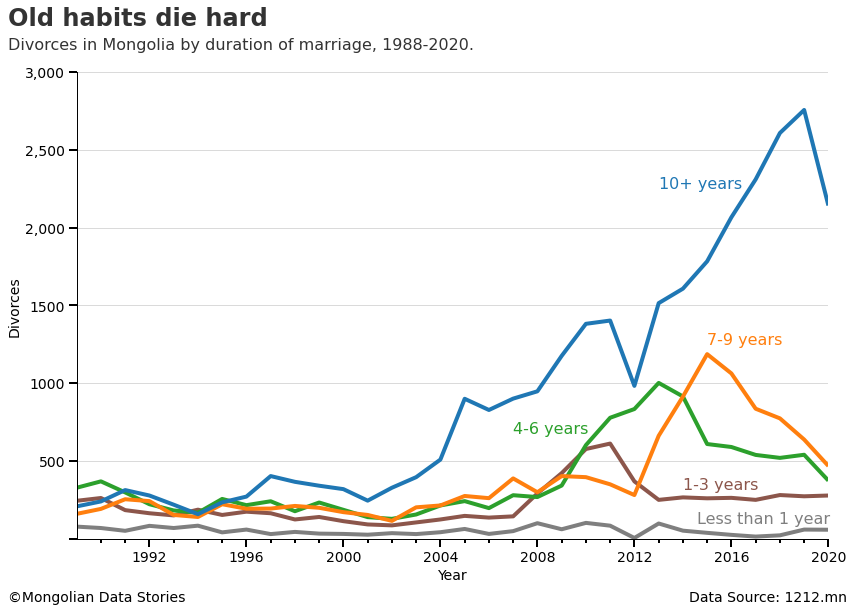

In [21]:
fig, ax = plt.subplots()

# Plot data and label axes
x = divorce['year'].unique()

ax.plot(x, divorce[divorce['Duration of marriage'] == 'Until 1 year']['divorces'], label='Less than 1 year', c='tab:gray')
ax.plot(x, divorce[divorce['Duration of marriage'] == '1-3']['divorces'], label='1-3 years', c='tab:brown')
ax.plot(x, divorce[divorce['Duration of marriage'] == '4-6']['divorces'], label='4-6 years', c='tab:green')
ax.plot(x, divorce[divorce['Duration of marriage'] == '7-9']['divorces'], label='7-9', c='tab:orange')
ax.plot(x, divorce[divorce['Duration of marriage'] == '10 and over']['divorces'], label='10 and over', c='tab:blue')

ax.set_xlabel('Year')
ax.set_ylabel("Divorces")
ax.set_ylim(top=3000, bottom=0)
ax.set_xlim(left=datetime.datetime(1989,1,1), right=datetime.datetime(2020,1,1))

# Set Spines
ax.spines.bottom.set_position(('data', 0))
ax.grid(axis='y', alpha=.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor',  width=2, length=4)
ax.tick_params(which='major',  width=2, length=8)

# Set custom yticks
ax.set_yticklabels(["","500","1000","1500", "2,000","2,500", "3,000"])

# Add annotations
ax.text(x = datetime.date(2014, 8, 1), y=100, s='Less than 1 year', fontsize = 16, c='tab:gray')
ax.text(x = datetime.date(2014, 1, 1), y=320, s='1-3 years', fontsize = 16, c='tab:brown')
ax.text(x = datetime.date(2007, 1, 1), y=680, s='4-6 years', fontsize = 16, c='tab:green')
ax.text(x = datetime.date(2015, 1, 1), y=1250, s='7-9 years', fontsize = 16, c='tab:orange')
ax.text(x = datetime.date(2013, 1, 1), y=2250, s='10+ years', fontsize = 16, c='tab:blue')

# Title and subtitle
ax.text(x = datetime.date(1986, 3, 1), y = 3300, s = 'Old habits die hard', fontsize=24, weight='bold', alpha=.8)
ax.text(x = datetime.date(1986, 3, 1), y = 3150, s = 'Divorces in Mongolia by duration of marriage, 1988-2020.', fontsize=16, alpha=.8)

# Set bottom banner
ax.text(x = datetime.date(1986, 3, 1), y = -400, s = '©Mongolian Data Stories', fontsize = 14 )
ax.text(x = datetime.date(2014, 4, 1), y = -400, s = 'Data Source: 1212.mn', fontsize = 14)

plt.savefig('divorces-by-duration.png', dpi = 300, bbox_inches="tight")

## Highlight time periods corresponding to x years after marriage subsidy

2006-2009

2006 + 1 = 2007
2009 + 3 = 2012

2006 + 4 = 2010
2009 + 6 = 2015

2006 + 7 = 2013
2009 + 9 = 2018

2016 + 10 = 2016
2

/tmp/ipykernel_32264/194690698.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","500","1000","1500", "2,000","2,500", "3,000"])


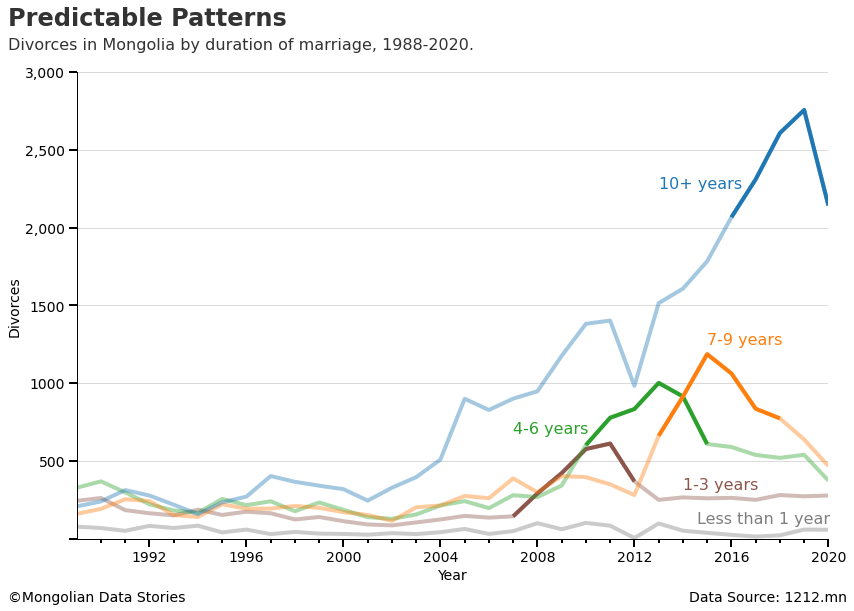

In [22]:
fig, ax = plt.subplots()

# Plot data and label axes
x = divorce['year'].unique()

ax.plot(x, divorce[divorce['Duration of marriage'] == 'Until 1 year']['divorces'], label='Less than 1 year', c='tab:gray', alpha=.4)
ax.plot(x, divorce[divorce['Duration of marriage'] == '1-3']['divorces'], label='1-3 years', c='tab:brown', alpha=.4)
ax.plot(divorce[(divorce['year'] >= '2007') & (divorce['year'] <= '2012') & (divorce['Duration of marriage'] == '1-3')]['year'], divorce[(divorce['year'] >= '2007') & (divorce['year'] <= '2012') & (divorce['Duration of marriage'] == '1-3')]['divorces'], label='1-3 years', c='tab:brown')
ax.plot(x, divorce[divorce['Duration of marriage'] == '4-6']['divorces'], label='4-6 years', c='tab:green', alpha=.4)
ax.plot(divorce[(divorce['year'] >= '2010') & (divorce['year'] <= '2015') & (divorce['Duration of marriage'] == '4-6')]['year'], divorce[(divorce['year'] >= '2010') & (divorce['year'] <= '2015') & (divorce['Duration of marriage'] == '4-6')]['divorces'], label='4-6 years', c='tab:green')
ax.plot(x, divorce[divorce['Duration of marriage'] == '7-9']['divorces'], label='7-9', c='tab:orange', alpha=.4)
ax.plot(divorce[(divorce['year'] >= '2013') & (divorce['year'] <= '2018') & (divorce['Duration of marriage'] == '7-9')]['year'], divorce[(divorce['year'] >= '2013') & (divorce['year'] <= '2018') & (divorce['Duration of marriage'] == '7-9')]['divorces'], label='7-9 years', c='tab:orange')
ax.plot(x, divorce[divorce['Duration of marriage'] == '10 and over']['divorces'], label='10 and over', c='tab:blue', alpha=.4)
ax.plot(divorce[(divorce['year'] >= '2016') & (divorce['Duration of marriage'] == '10 and over')]['year'], divorce[(divorce['year'] >= '2016') & (divorce['Duration of marriage'] == '10 and over')]['divorces'], label='10 and over', c='tab:blue')

ax.set_xlabel('Year')
ax.set_ylabel("Divorces")
ax.set_ylim(top=3000, bottom=0)
ax.set_xlim(left=datetime.datetime(1989,1,1), right=datetime.datetime(2020,1,1))

# Set Spines
ax.spines.bottom.set_position(('data', 0))
ax.grid(axis='y', alpha=.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor',  width=2, length=4)
ax.tick_params(which='major',  width=2, length=8)

# Set custom yticks
ax.set_yticklabels(["","500","1000","1500", "2,000","2,500", "3,000"])

# Add annotations
ax.text(x = datetime.date(2014, 8, 1), y=100, s='Less than 1 year', fontsize = 16, c='tab:gray')
ax.text(x = datetime.date(2014, 1, 1), y=320, s='1-3 years', fontsize = 16, c='tab:brown')
ax.text(x = datetime.date(2007, 1, 1), y=680, s='4-6 years', fontsize = 16, c='tab:green')
ax.text(x = datetime.date(2015, 1, 1), y=1250, s='7-9 years', fontsize = 16, c='tab:orange')
ax.text(x = datetime.date(2013, 1, 1), y=2250, s='10+ years', fontsize = 16, c='tab:blue')

# Title and subtitle
ax.text(x = datetime.date(1986, 3, 1), y = 3300, s = 'Predictable Patterns', fontsize=24, weight='bold', alpha=.8)
ax.text(x = datetime.date(1986, 3, 1), y = 3150, s = 'Divorces in Mongolia by duration of marriage, 1988-2020.', fontsize=16, alpha=.8)

# Set bottom banner
ax.text(x = datetime.date(1986, 3, 1), y = -400, s = '©Mongolian Data Stories', fontsize = 14 )
ax.text(x = datetime.date(2014, 4, 1), y = -400, s = 'Data Source: 1212.mn', fontsize = 14)

plt.savefig('divorces-duration-highlighted.png', dpi = 300, bbox_inches="tight")